In [1]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

2024-08-10 14:25:09.282871: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


2024-08-10 14:25:11.264373: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-10 14:25:12.234637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 14:25:12.234695: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-10 14:25:12.234767: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-10 14:25:12.250412: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-10 14:25:12.250532: I tensorflow/str

In [3]:
train_data_path = '../datasets/ready/train/'
val_data_path = '../datasets/ready/val/'

#loading the datasets
x_train = load_data(train_data_path+"x_train.csv")
y_train = load_data(train_data_path+"y_train.csv")
x_val = load_data(val_data_path+"/x_val.csv")
y_val = load_data(val_data_path+"/y_val.csv")

In [4]:
save_path = '../models'
# Setting up hyperparameters
batch_size = 64
epochs = 2048

optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [5]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics, x_train=x_train)

2024-08-10 14:25:12.436065: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 14:25:12.456441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 14:25:12.456532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-10 14:25:12.456585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

In [6]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

2024-08-10 14:25:14.066995: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-10 14:25:14.067597: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz


Epoch 1/2048


2024-08-10 14:25:14.433562: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


9/9 [==============================] - 2s 22ms/step - loss: 0.6971 - accuracy: 0.5431 - val_loss: 0.7010 - val_accuracy: 0.6910
Epoch 2/2048
1/9 [==>...........................] - ETA: 0s - loss: 0.7332 - accuracy: 0.6562

2024-08-10 14:25:16.315844: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-08-10 14:25:16.315934: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


9/9 [==============================] - 0s 13ms/step - loss: 0.6639 - accuracy: 0.6311 - val_loss: 0.6151 - val_accuracy: 0.6685
Epoch 3/2048
9/9 [==============================] - 0s 11ms/step - loss: 0.6241 - accuracy: 0.6592 - val_loss: 0.6340 - val_accuracy: 0.6236
Epoch 4/2048
9/9 [==============================] - 0s 11ms/step - loss: 0.6464 - accuracy: 0.6629 - val_loss: 0.5705 - val_accuracy: 0.6236
Epoch 5/2048
9/9 [==============================] - 0s 8ms/step - loss: 0.5874 - accuracy: 0.6536 - val_loss: 0.5709 - val_accuracy: 0.7135
Epoch 6/2048
9/9 [==============================] - 0s 7ms/step - loss: 0.5776 - accuracy: 0.7041 - val_loss: 0.5483 - val_accuracy: 0.7528
Epoch 7/2048
9/9 [==============================] - 0s 9ms/step - loss: 0.5358 - accuracy: 0.7154 - val_loss: 0.5190 - val_accuracy: 0.7191
Epoch 8/2048
9/9 [==============================] - 0s 11ms/step - loss: 0.5296 - accuracy: 0.7397 - val_loss: 0.5420 - val_accuracy: 0.6629
Epoch 9/2048
9/9 [===========

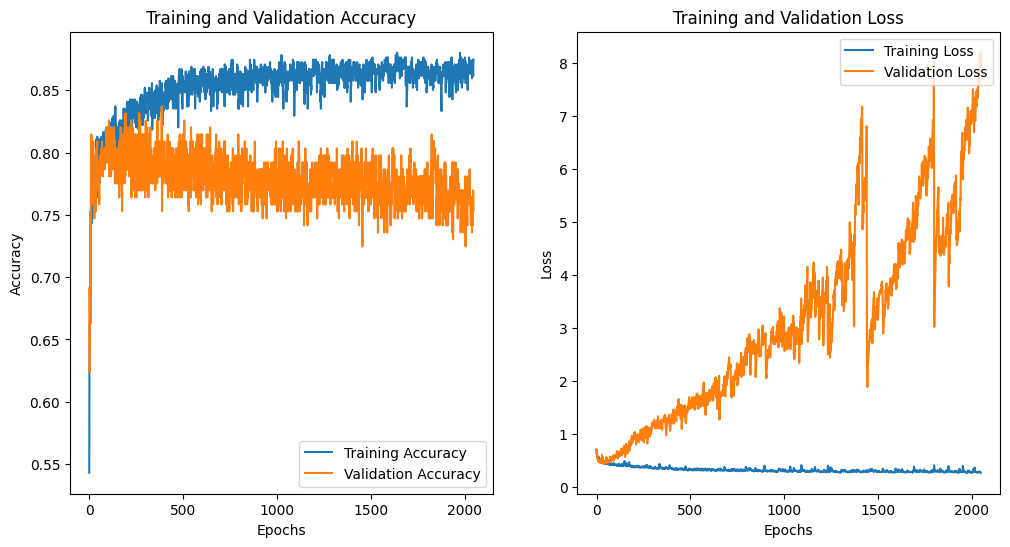

In [7]:
# Get predictions on the training data
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-08-10 14:27:59.940582: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
